# <center> PREDICTING CINEMA TICKET SALES

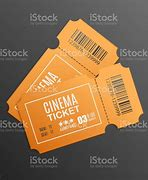

This is the  data of  sales history of movies in cinemas. The granularity is show time. It means the total sales computed by date, cinema, movie, show time. Also occupation percent (on available cinema capacity) computed at show time. Some tickets might cancelled due to reservation or any other reasons.this analyse will cross validate the data and predict the value.

### Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import klib as k
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

In [3]:
#importing the data
data=pd.read_csv('./cinemaTicket_Ref.csv')


In [4]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [166]:
data.tail()

,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,month
141695,448.0,13760000.0,172.0,3.0,30.18,80000.000000,172.0,569.913850,11.0
141697,344.0,7280000.0,91.0,3.0,11.53,80000.000000,91.0,789.245447,11.0
142164,344.0,13840000.0,174.0,3.0,22.05,79540.229885,174.0,789.115646,10.0
142328,429.0,12840000.0,107.0,4.0,20.11,120000.000000,107.0,532.073595,9.0
142368,429.0,10080000.0,84.0,4.0,15.79,120000.000000,84.0,531.982267,9.0


In [160]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cinema_code,1823.0,4.494026e+02,6.438584e+01,3.440000e+02,3.960000e+02,4.480000e+02,5.180000e+02,5.560000e+02
total_sales,1823.0,1.314938e+07,4.672142e+06,5.560000e+06,9.295000e+06,1.247000e+07,1.685000e+07,2.382000e+07
tickets_sold,1823.0,1.337521e+02,4.704584e+01,6.100000e+01,9.400000e+01,1.280000e+02,1.680000e+02,2.540000e+02
show_time,1823.0,4.373012e+00,1.581026e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,8.000000e+00
occu_perc,1823.0,1.762003e+01,7.049441e+00,7.410000e+00,1.210500e+01,1.593000e+01,2.211500e+01,3.815000e+01
ticket_price,1823.0,9.920585e+04,1.500153e+04,7.930233e+04,8.533333e+04,9.958549e+04,1.119688e+05,1.352703e+05
ticket_use,1823.0,1.334849e+02,4.699467e+01,6.100000e+01,9.400000e+01,1.280000e+02,1.680000e+02,2.540000e+02
capacity,1823.0,8.000510e+02,2.314617e+02,5.040323e+02,6.149716e+02,7.431341e+02,9.303850e+02,1.536857e+03
month,1823.0,6.597367e+00,2.110617e+00,4.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.100000e+01


In [6]:
data.shape

(142524, 14)

#### Data cleaning

In [7]:
data.duplicated().mean()*100

0.07437343885942016

In [8]:
## droping duplicated values

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().mean()*100

0.0

In [10]:
data.isnull().mean()*100

film_code       0.000000
cinema_code     0.000000
total_sales     0.000000
tickets_sold    0.000000
tickets_out     0.000000
show_time       0.000000
occu_perc       0.086365
ticket_price    0.000000
ticket_use      0.000000
capacity        0.086365
date            0.000000
month           0.000000
quarter         0.000000
day             0.000000
dtype: float64

In [11]:
## droping null values

In [12]:
data.dropna(inplace=True)


In [13]:
data.isnull().mean()*100

film_code       0.0
cinema_code     0.0
total_sales     0.0
tickets_sold    0.0
tickets_out     0.0
show_time       0.0
occu_perc       0.0
ticket_price    0.0
ticket_use      0.0
capacity        0.0
date            0.0
month           0.0
quarter         0.0
day             0.0
dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142295 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142295 non-null  int64  
 1   cinema_code   142295 non-null  int64  
 2   total_sales   142295 non-null  int64  
 3   tickets_sold  142295 non-null  int64  
 4   tickets_out   142295 non-null  int64  
 5   show_time     142295 non-null  int64  
 6   occu_perc     142295 non-null  float64
 7   ticket_price  142295 non-null  float64
 8   ticket_use    142295 non-null  int64  
 9   capacity      142295 non-null  float64
 10  date          142295 non-null  object 
 11  month         142295 non-null  int64  
 12  quarter       142295 non-null  int64  
 13  day           142295 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 16.3+ MB


## Droping un wanted columns

In [15]:
### column has no high correlation 
data.drop(columns="date",inplace=True)

In [16]:
data.drop(columns='quarter',inplace=True)

In [17]:
### duplications
data.drop(columns='tickets_out',inplace=True)

In [18]:
data.drop(columns='day',inplace=True)

In [19]:
data.drop(columns='film_code',inplace=True)

# Univariate analyse

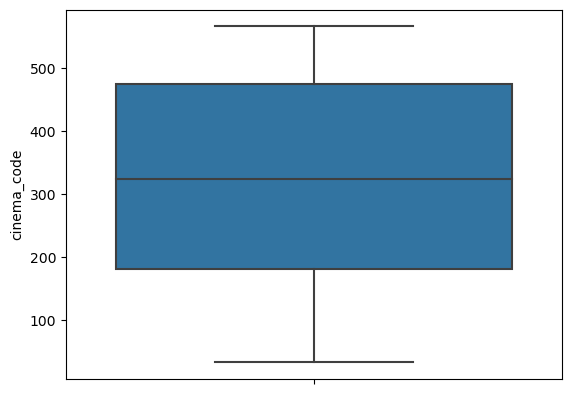

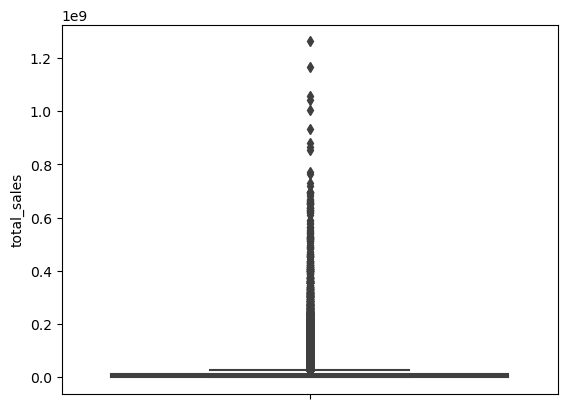

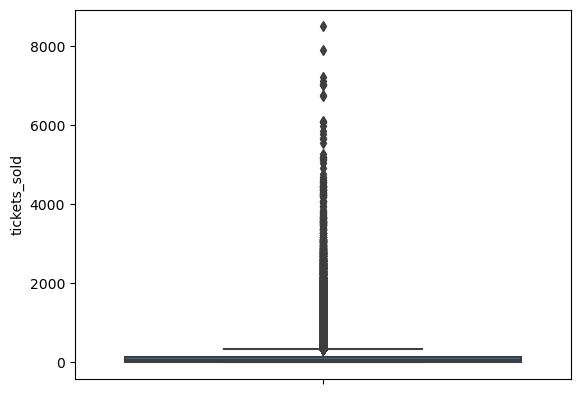

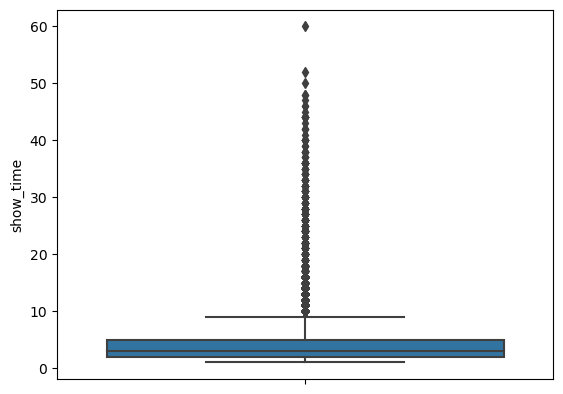

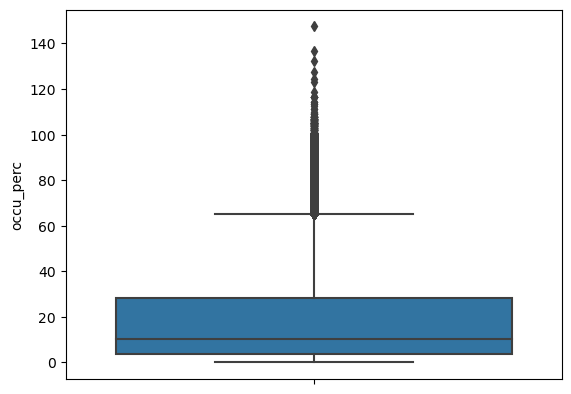

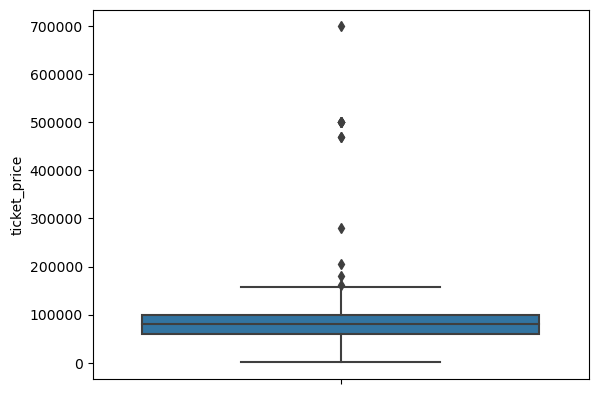

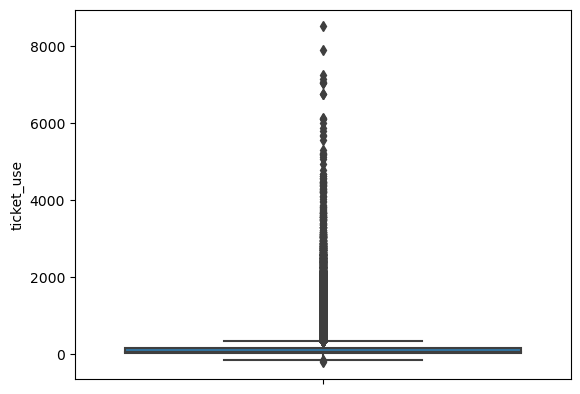

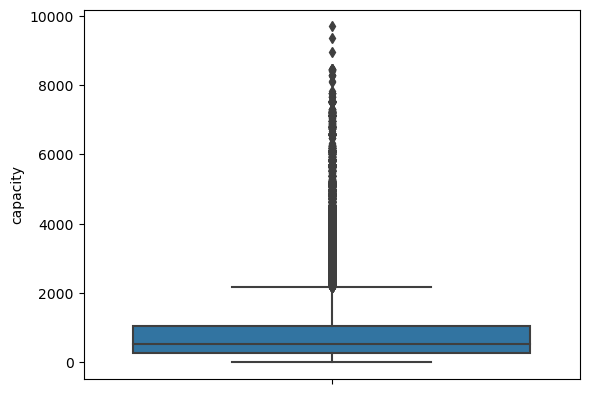

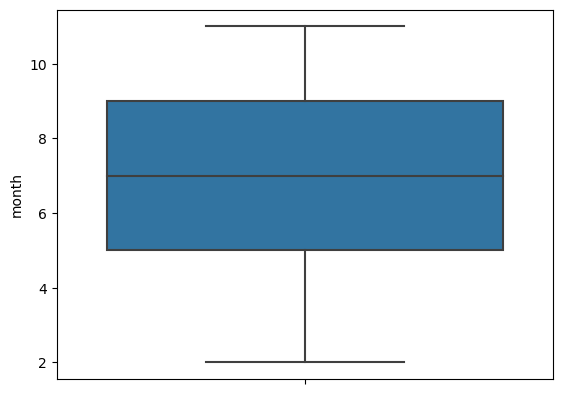

In [20]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

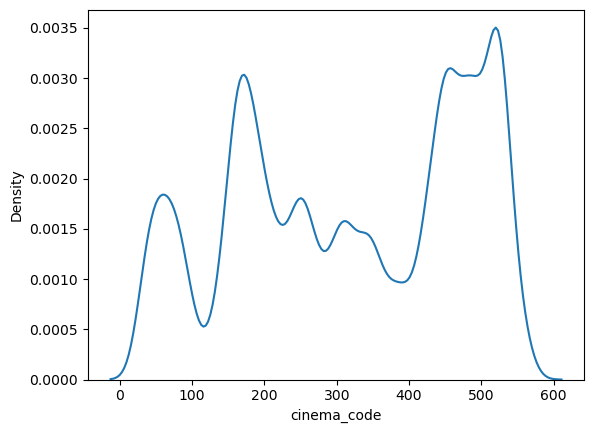

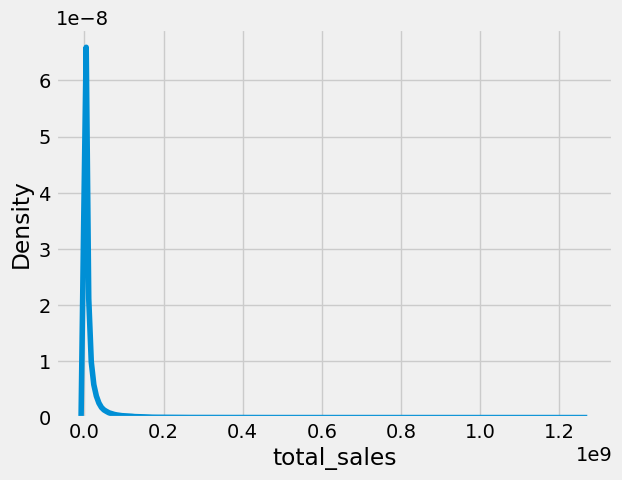

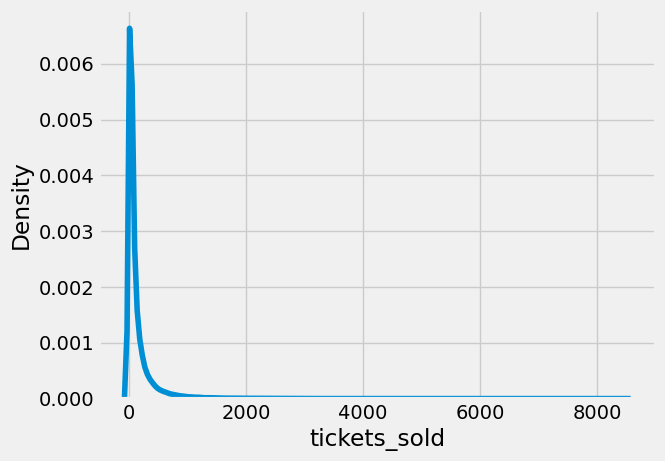

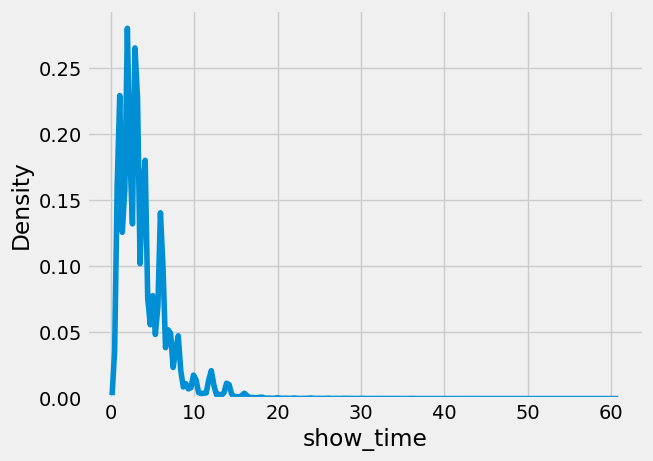

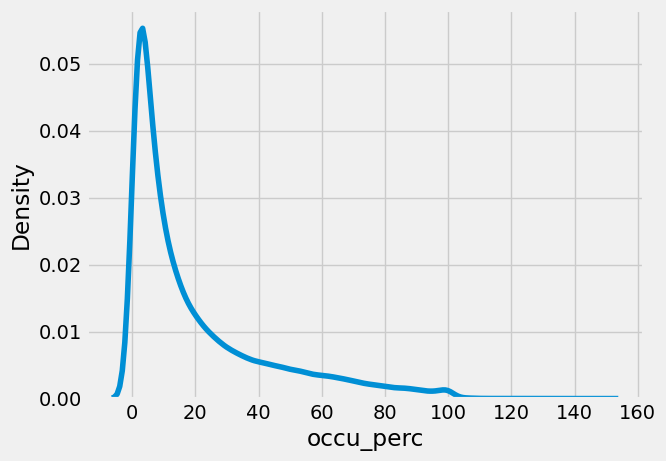

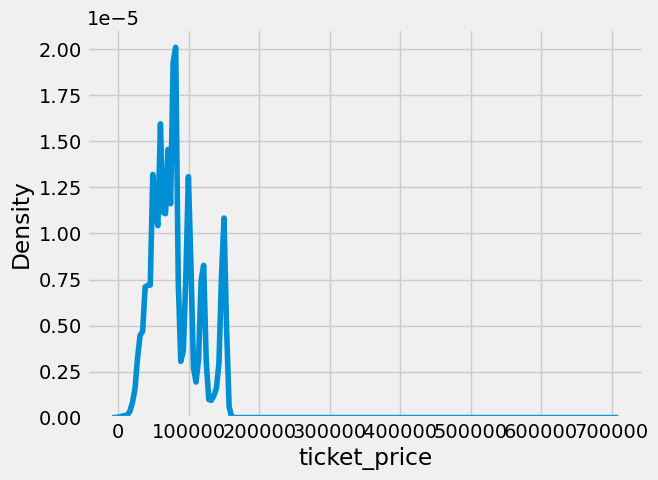

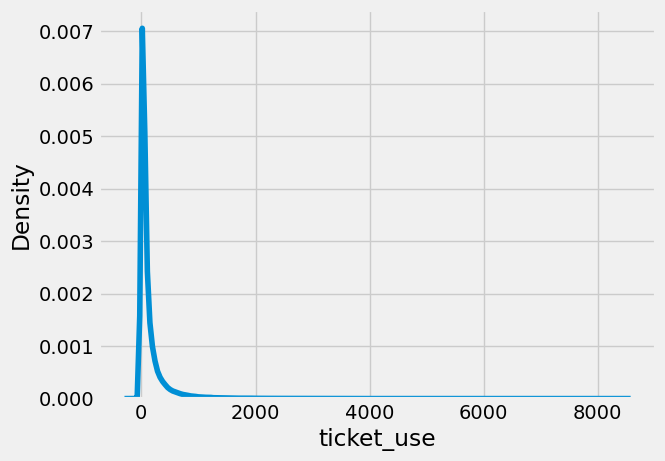

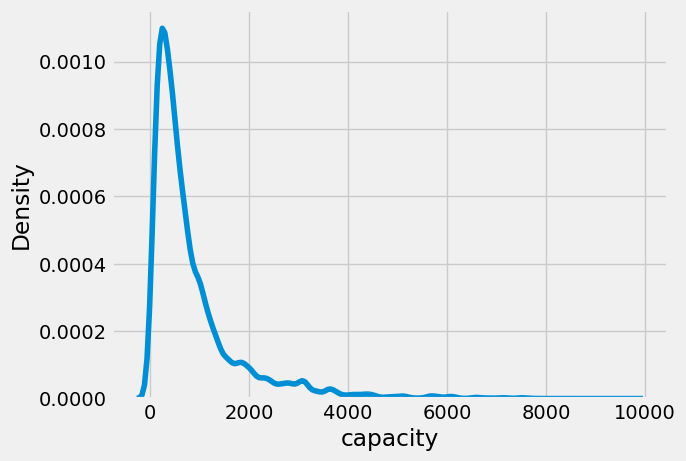

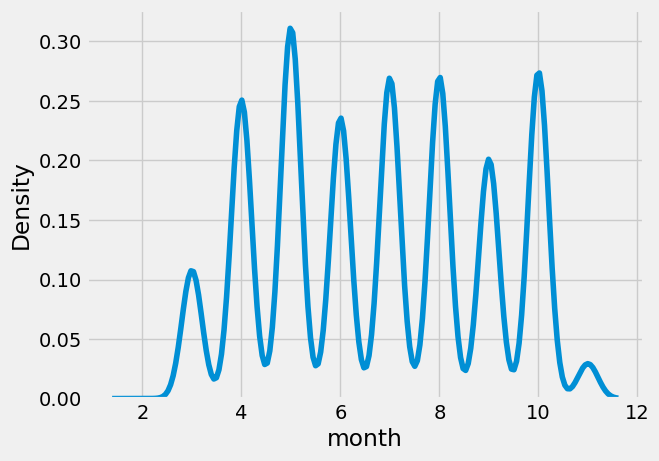

In [21]:
for  i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.style.use('fivethirtyeight')
        plt.show()

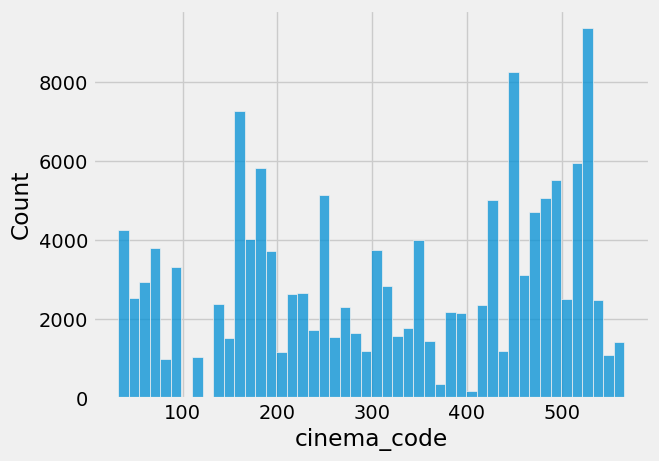

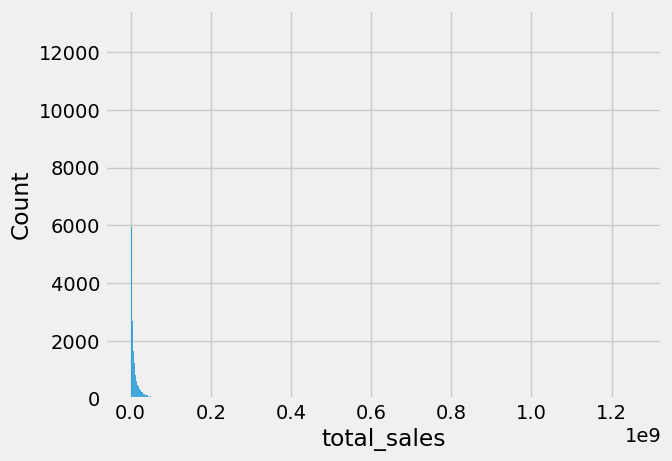

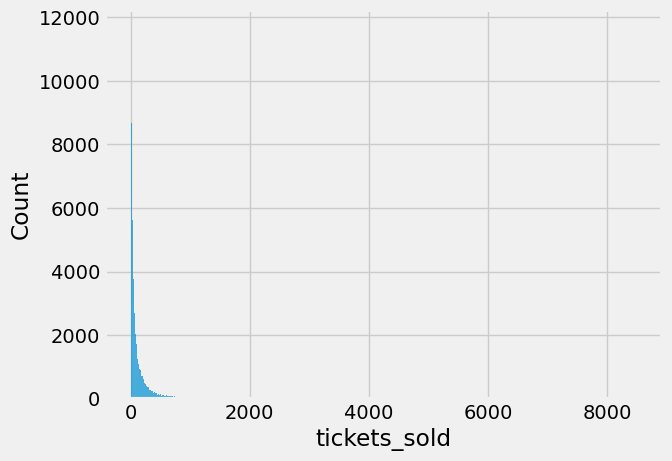

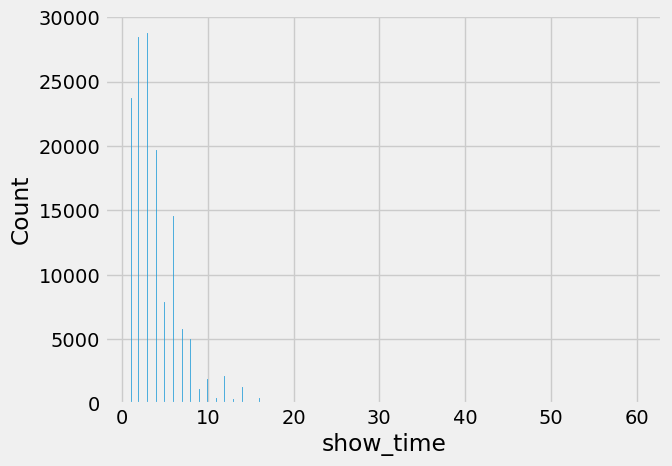

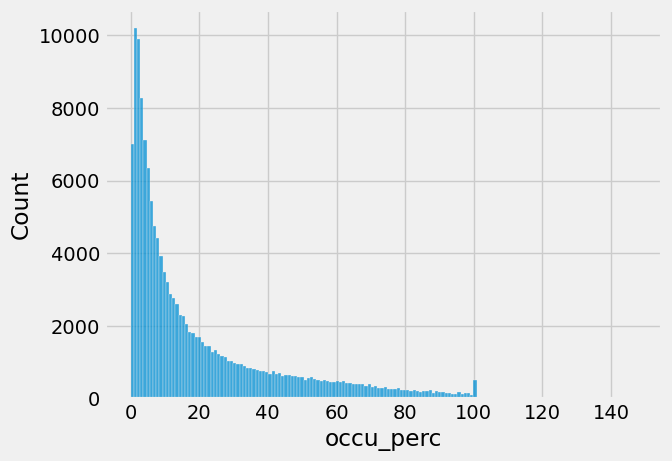

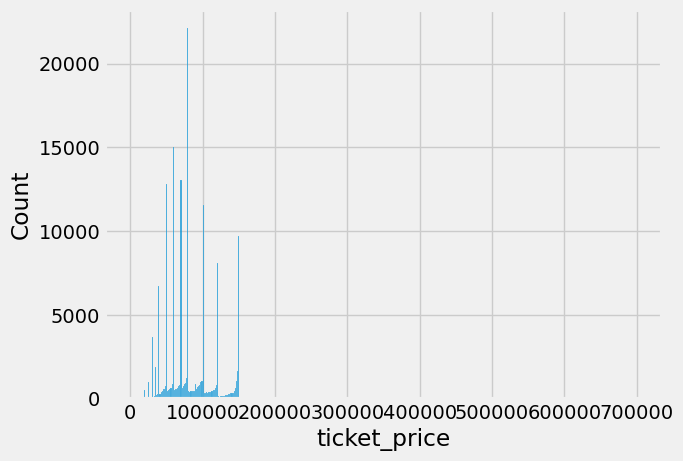

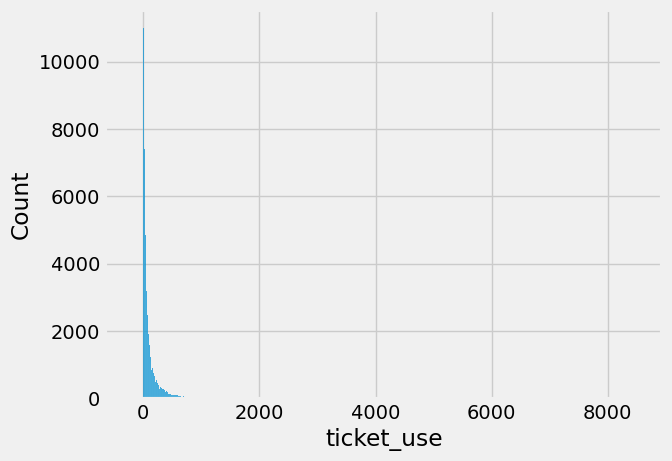

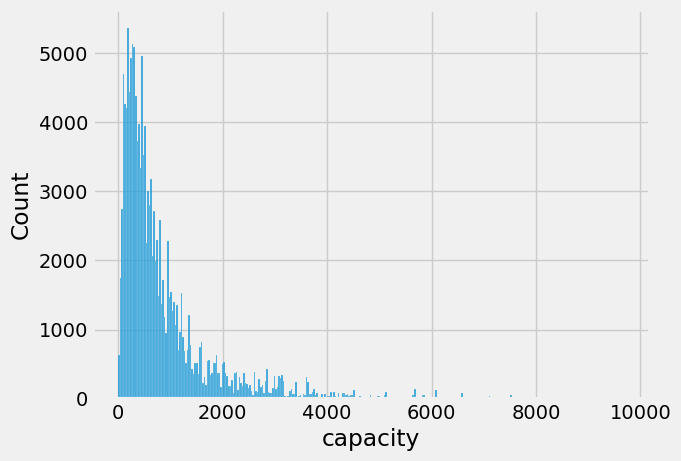

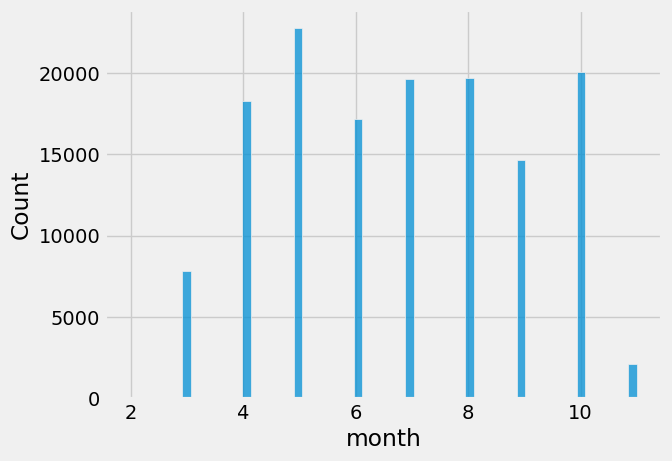

In [22]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.style.use('fivethirtyeight')
        plt.show()

# Multy variate analyse

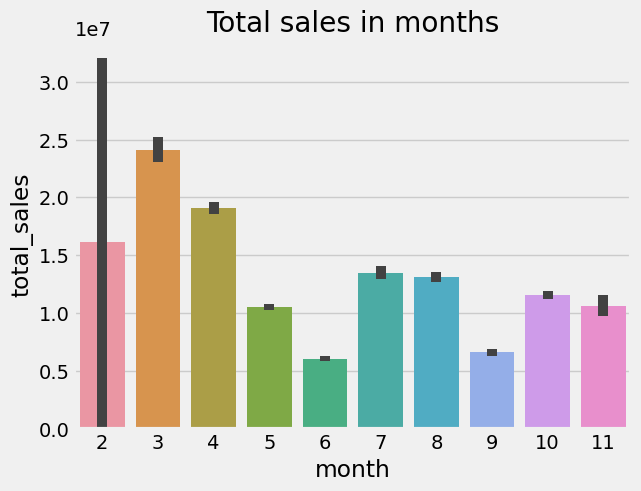

In [50]:
plt.title('Total sales in months')
sns.barplot(x='month',y='total_sales',data=data.sort_values(by='total_sales',ascending=False))
plt.style.use('fivethirtyeight')
plt.show()

By analyzing the giveen bar diagram we can clearly see the diffrence in the sales on each months. The total ticket sold in first month is very high than an other month.The second two months sales are i in increased value.then the sales in every month touched the bottom

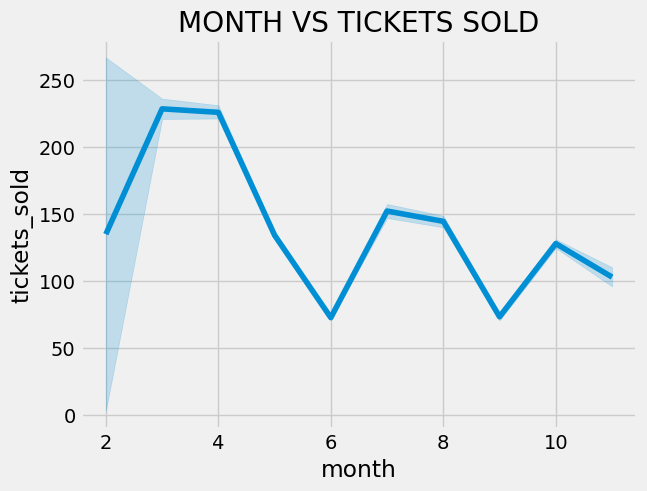

In [51]:
sns.lineplot(x='month',y='tickets_sold',data=data.sort_values(by='month'))
plt.style.use('fivethirtyeight')
plt.title('MONTH VS TICKETS SOLD')
plt.show()

This line chart indicates the total tickets sold in every month.as we can see, most ticket sold in first four months then the sales gradually decreased respectively

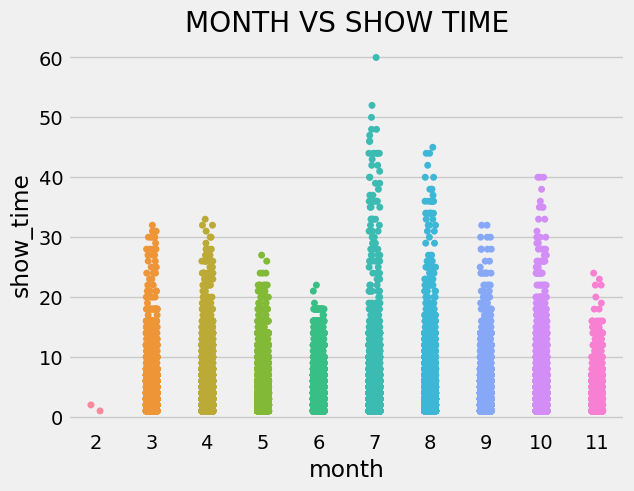

In [52]:
sns.stripplot(x='month',y='show_time',data=data.sort_values(by='month',ascending=False))
plt.style.use('fivethirtyeight')
plt.title('MONTH VS SHOW TIME')
plt.show()

Text(0.5, 1.0, 'Month with more capacity')

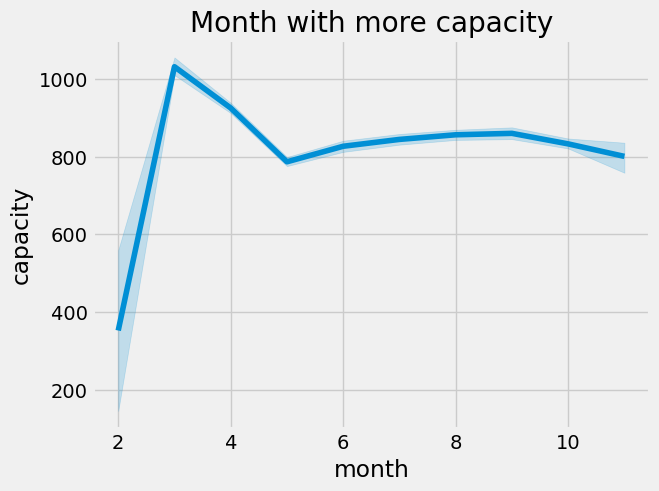

In [26]:
sns.lineplot(x='month',y='capacity',data=data.sort_values(by='month',ascending=True))
plt.title('Month with more capacity')

WE can understand after analyzing this diagram that more capacity is in first four months

In [65]:
x=data.groupby(['month'])['total_sales'].sum()
x.reset_index()

,month,total_sales
0,2,32210000
1,3,189502975738
2,4,348510864007
3,5,239585133317
4,6,104001473893
5,7,264855222688
6,8,258275380764
7,9,96566384964
8,10,231660299820
9,11,22692034998


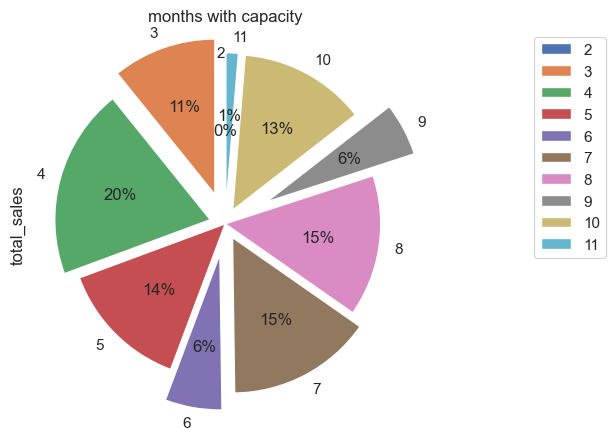

In [109]:
plt.title('months with capacity')
sns.set_style('white')
myexplode=(0,0.2,0.1,0,0.2,0.1,0,0.3,0.1,0.1)
x.plot.pie(autopct='%1.0f%%',startangle=90,explode=myexplode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

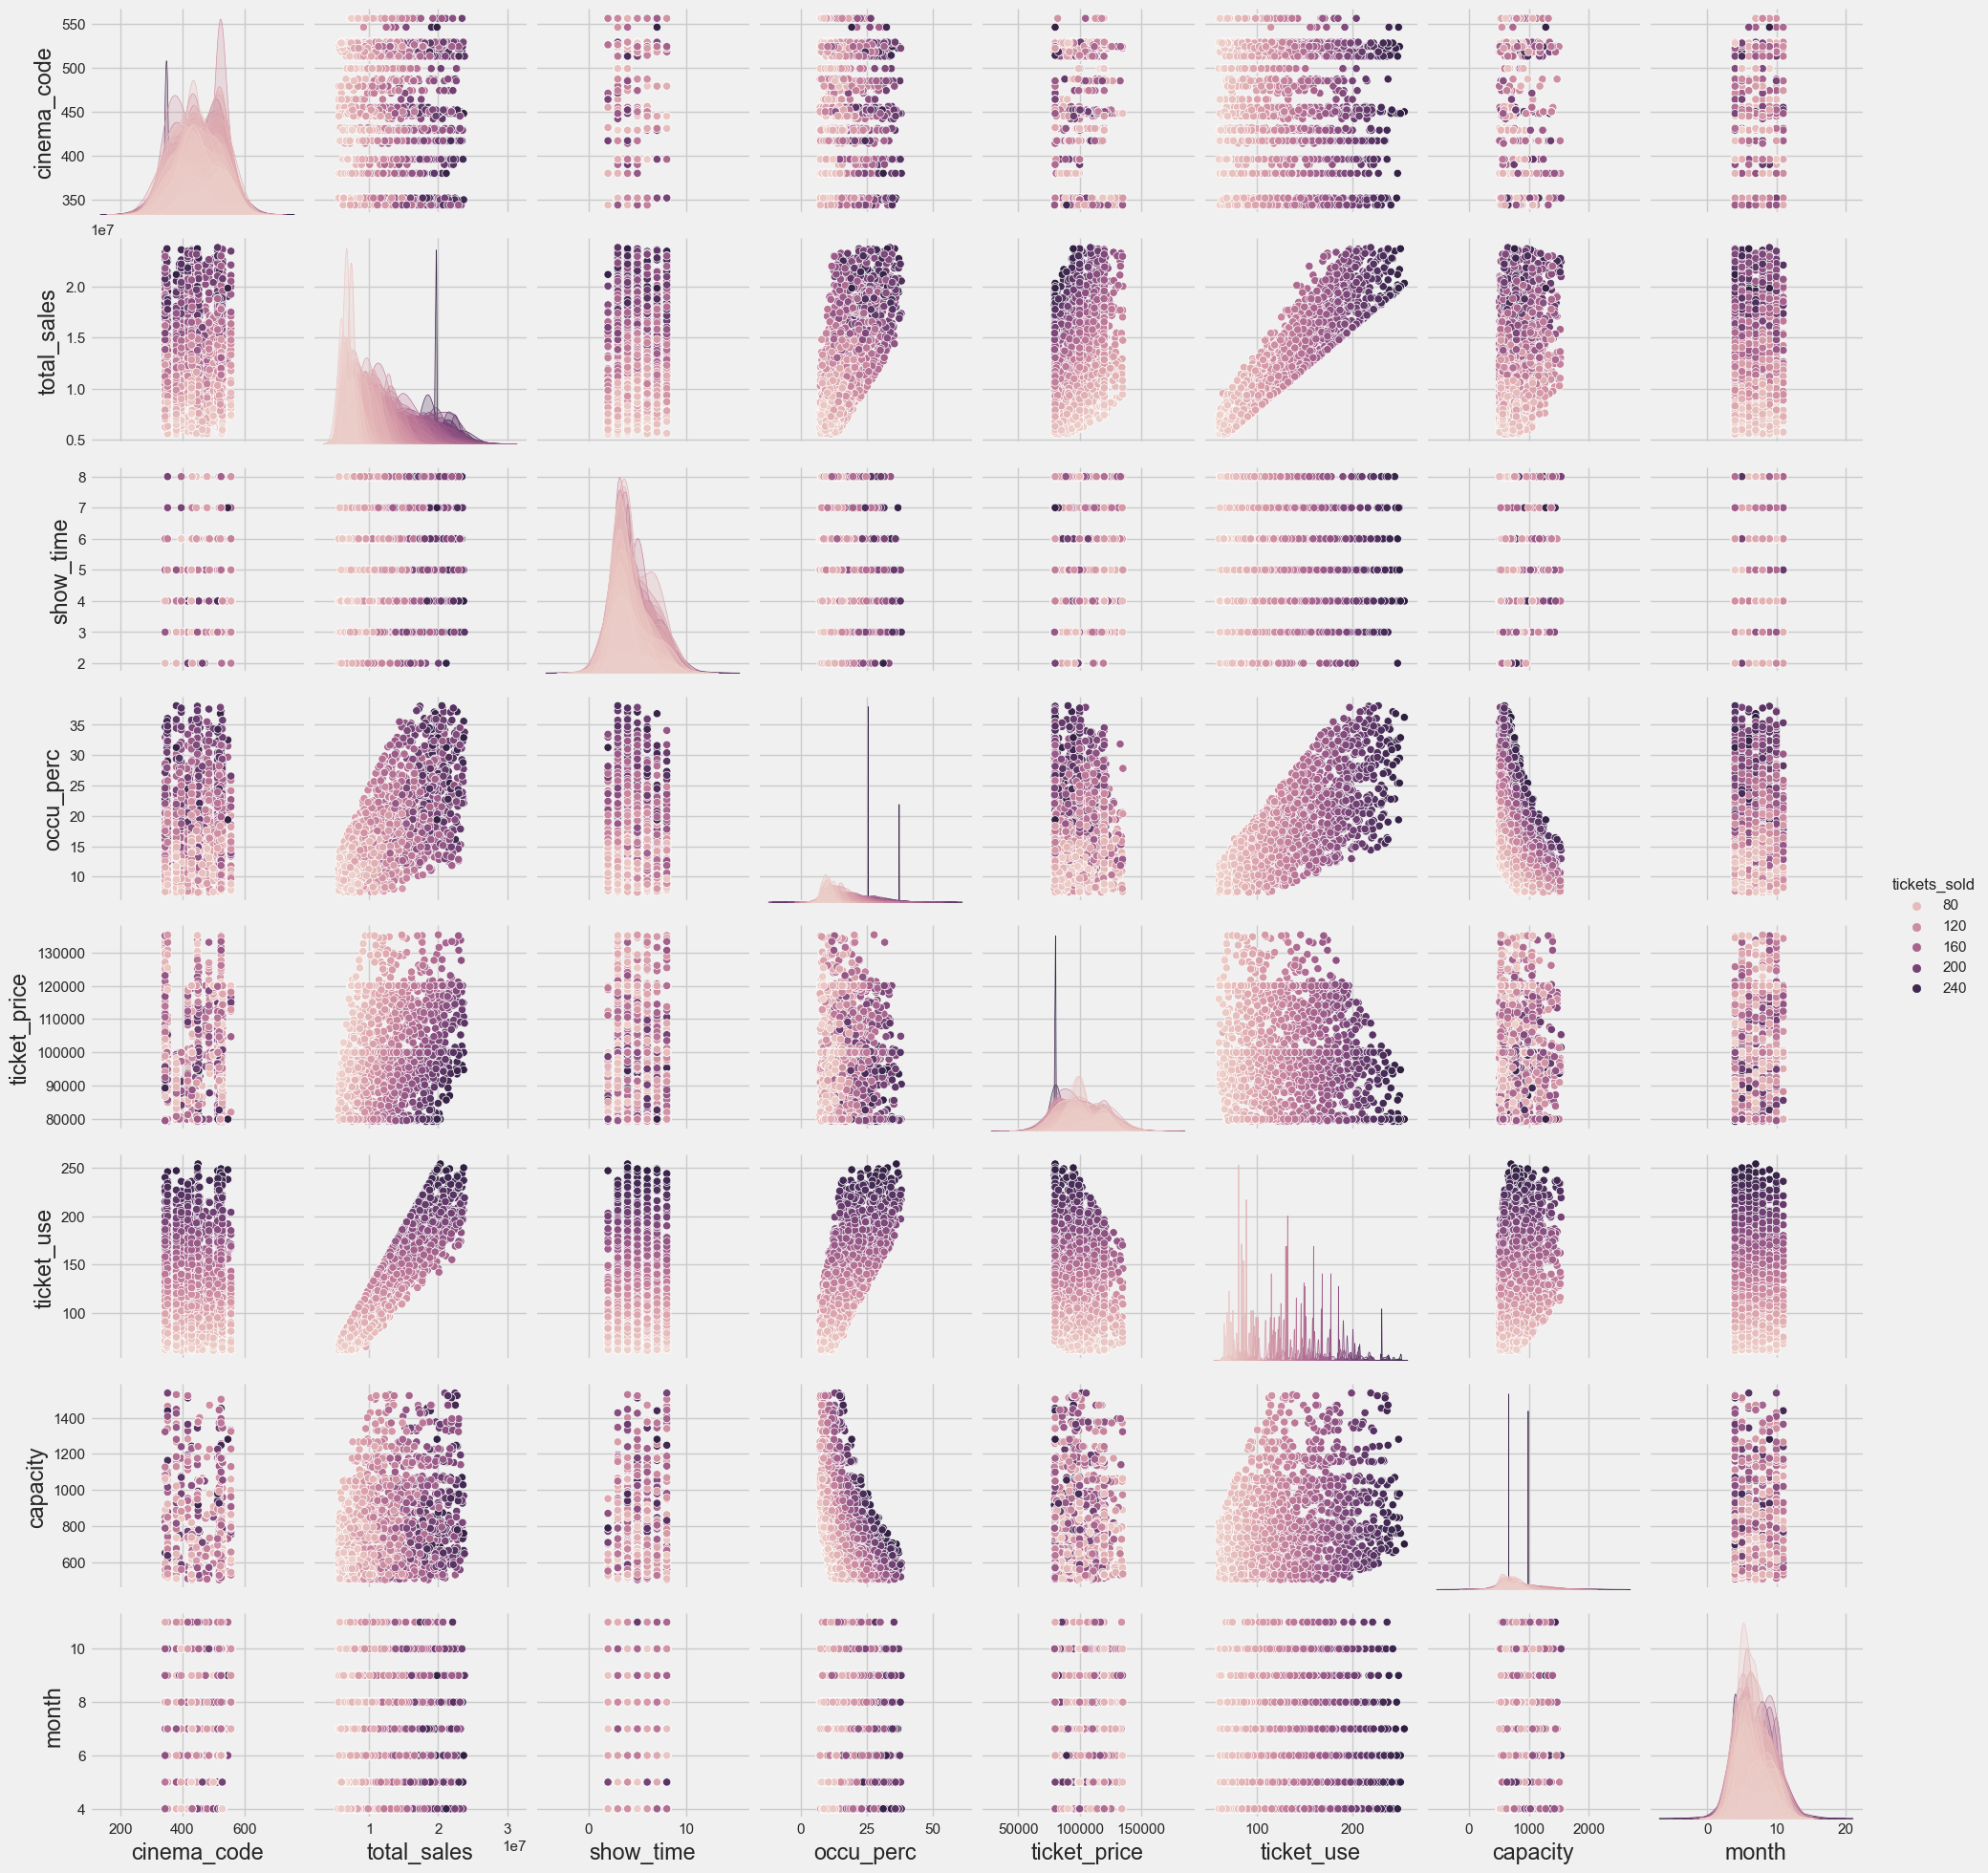

In [176]:
sns.pairplot(data,hue='tickets_sold')
plt.show()

In [14]:
month_ticket_sold=data.groupby(['month']) ['total_sales'].sum()
month_ticket_sold.reset_index()

,month,total_sales
0,2,32210000
1,3,193433625732
2,4,348614664007
3,5,239595373317
4,6,104001473893
5,7,264855462688
6,8,258296800764
7,9,96569594964
8,10,231675849820
9,11,22708024998


Text(0.5, 1.0, 'barh presentation of sum of ticket sales in months')

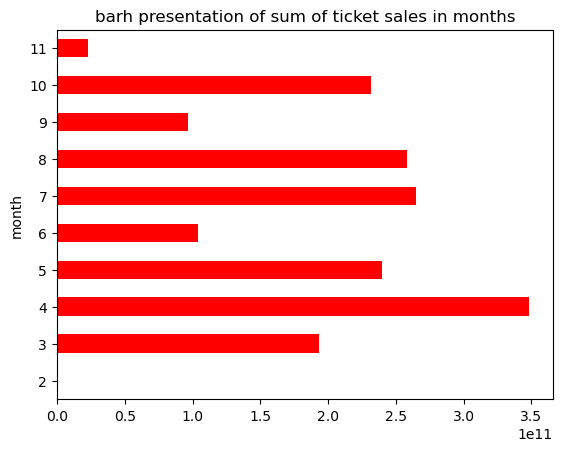

In [31]:
month_ticket_sold.plot.barh(x=month_ticket_sold,color='red')
plt.title('barh presentation of sum of ticket sales in months')

#  Removing outliers

In [119]:
def outlier_limit (col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5%IQR
    return UL,LL

In [120]:
for i in data.columns:
    if data[i].dtype!= 'object':
        UL,LL=outlier_limit(data[i])
        data[i]=np.where((data[i]>UL)|(data[i]<LL),np.nan,data[i])

In [121]:
data.dropna(inplace=True)

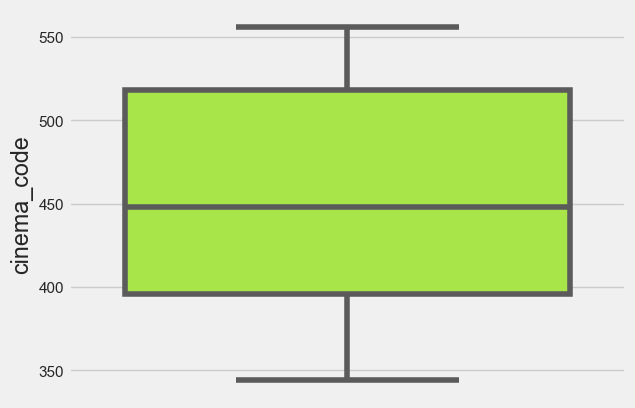

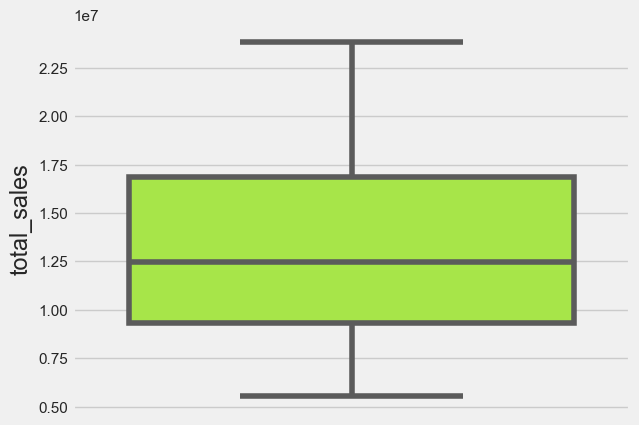

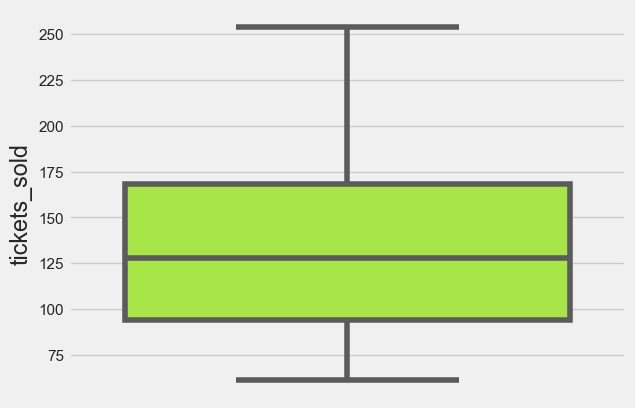

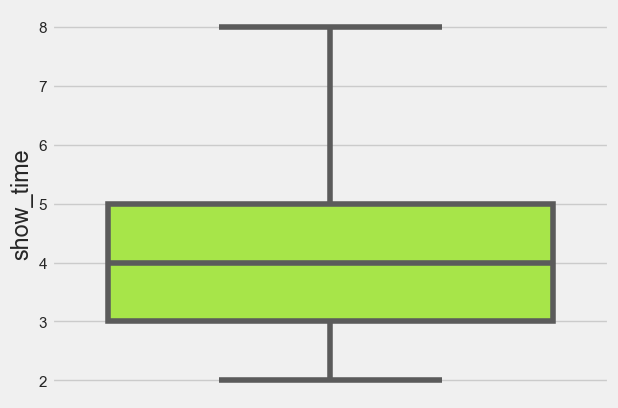

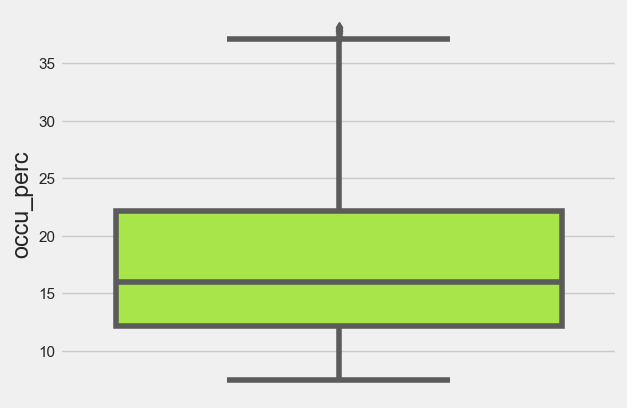

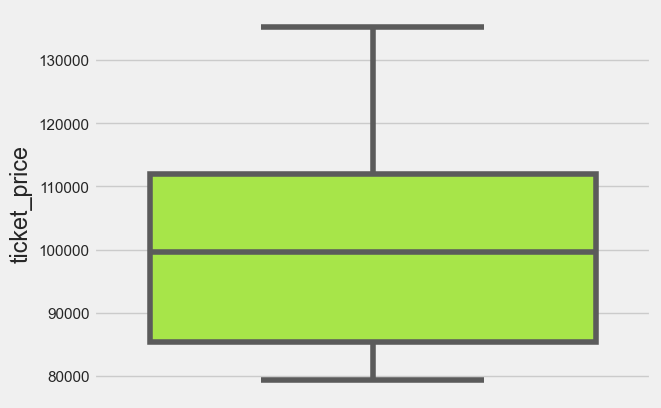

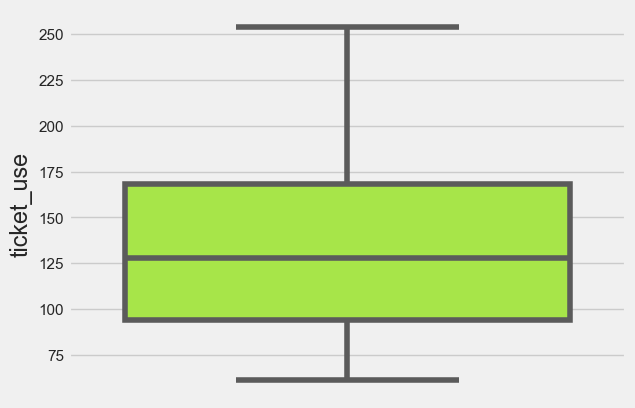

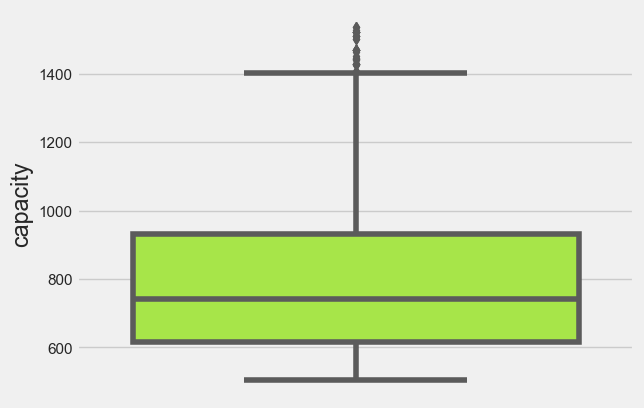

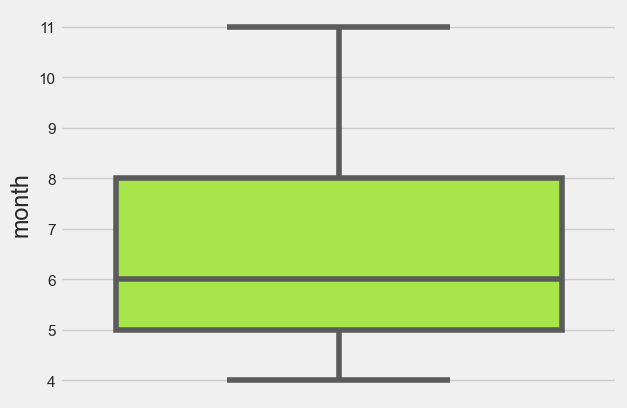

In [177]:
#Bar plot after outlier removal
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i],color='greenyellow')
        plt.show()

# Checking correlation

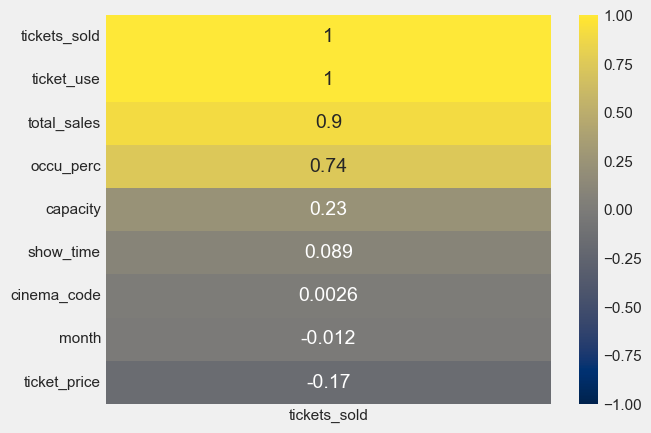

In [178]:
sns.heatmap(data.corr()[['tickets_sold']].sort_values(by='tickets_sold',ascending=False),vmin=-1,vmax=1,annot=True,cmap="cividis")
plt.show()

### selecting only high correlated values

In [126]:
x=data[['ticket_use','total_sales','occu_perc']].values
y=data[['tickets_sold']].values

### Scaling

In [127]:
rs=RobustScaler()

In [128]:
x=rs.fit_transform(x)

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#  Cross validation, Model selection

In [131]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [132]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  99.9593458039395
training_score:  99.93590126667428
testing_score:  99.9593458039395
mae:  0.4782422376448946
mse:  0.9488299251123926
rmse_test:  0.9740790137932306
****************************************************************************************************
model trained with Ridge
r2score:  99.95422094854065
training_score:  99.93399633218358
testing_score:  99.95422094854065
mae:  0.5319832088090546
mse:  1.068439132414679
rmse_test:  1.0336532941052714
****************************************************************************************************
model trained with LinearSVR
r2score:  99.95715333698429
training_score:  99.93232825318523
testing_score:  99.95715333698429
mae:  0.25479452054843005
mse:  1.000000000000276
rmse_test:  1.000000000000138
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  99.94001467177803
training

# GradientBoostingRegressor

In [133]:
model=GradientBoostingRegressor()

In [134]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [135]:
y_pred=model.predict(x)

In [136]:
result=pd.DataFrame(zip(y,y_pred),columns=('actual','predicted'),dtype=float)

In [137]:
result

,actual,predicted
0,183.0,182.697503
1,225.0,225.924329
2,182.0,182.675167
3,99.0,99.711708
4,142.0,142.705416
...,...,...
1818,172.0,172.011988
1819,91.0,91.206241
1820,174.0,174.217776
1821,107.0,107.111973


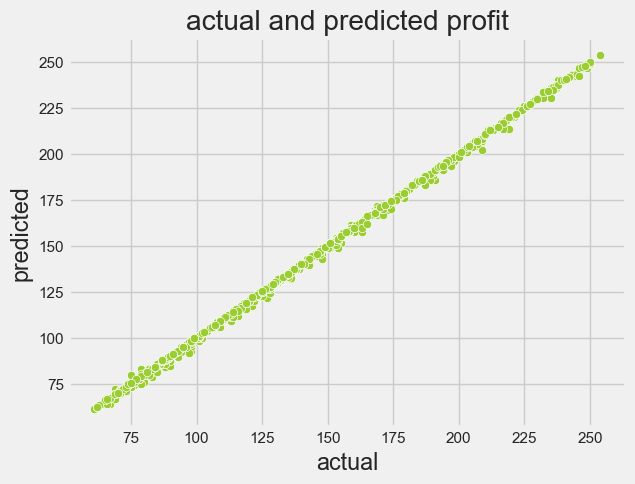

In [151]:
plt.title('actual and predicted profit')
sns.scatterplot(data=result,x='actual',y='predicted',color='yellowgreen')
plt.style.use('fivethirtyeight')